# Spaceship Titanic-Solution (Classification problem)

BY: Santiago Cadena

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [40]:
df_test = pd.read_csv("test.csv")
df_train=pd.read_csv("train.csv")
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Exploration
###  Identifying the dataset

In [41]:
def idfy_cols(df):
    #missed = df.loc[:, df.isna().any()]
    total =df.columns
    categorical = df.dtypes == 'object'
    # Reindex the boolean series to match the dataframe columns
    categorical = categorical.reindex(total, fill_value=False)
    categorical = df.loc[:, categorical].columns
    numerical = total.difference(categorical)
    
    
    
    return categorical, numerical

#Total cols
cat,num=idfy_cols(df_test)
print("# Total Of Categorical Cols:",cat.shape[0],"\n# Total Of Numerical Cols:",num.shape[0])
#None cols
cat_train,num_train=idfy_cols(df_train.loc[:, df_train.isna().any()])
total=len(df_train)
cat_ncols_train=df_train[cat_train].isnull().sum()*100/total
print("Nan Categorical (%)")
cat_ncols_train.sort_values(ascending=False)

# Total Of Categorical Cols: 7 
# Total Of Numerical Cols: 6
Nan Categorical (%)


CryoSleep      2.496261
VIP            2.335212
HomePlanet     2.312205
Name           2.300702
Cabin          2.289198
Destination    2.093639
dtype: float64

In [42]:
num_ncols_train=df_train[num_train].isnull().sum()*100/total
print("NaN Numerical (%)")
num_ncols_train.sort_values(ascending=False)

NaN Numerical (%)


ShoppingMall    2.392730
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
RoomService     2.082135
Age             2.059128
dtype: float64

##  Removing Outliers

### Numerical

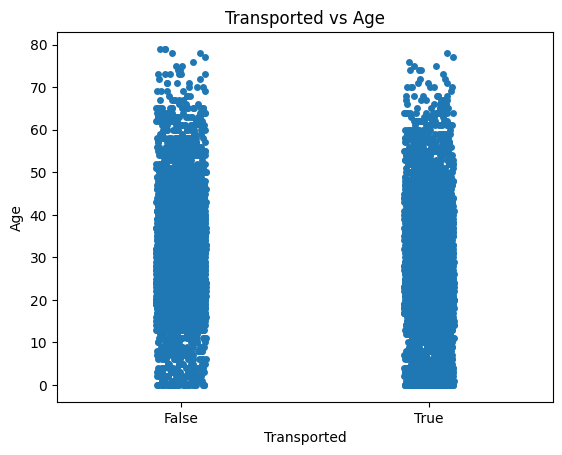

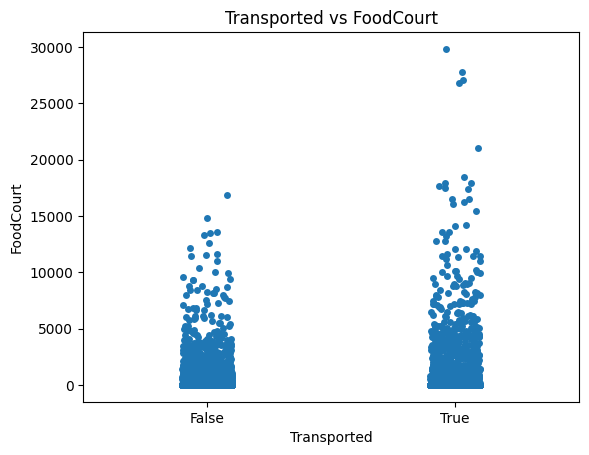

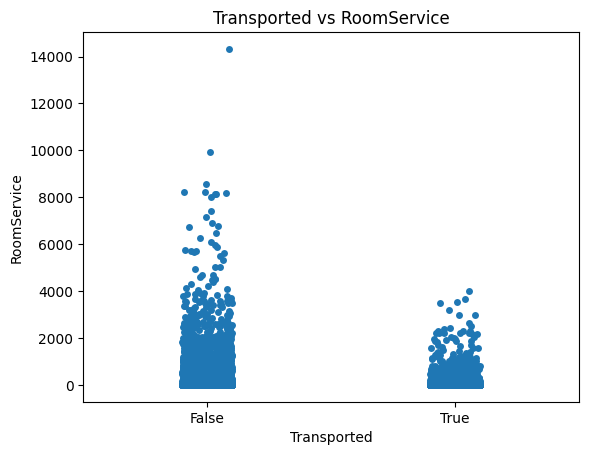

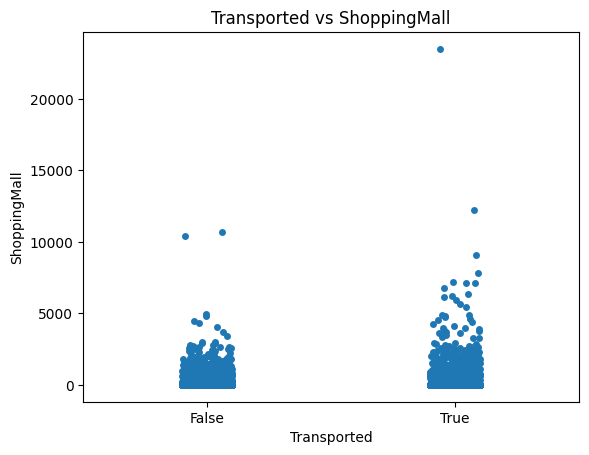

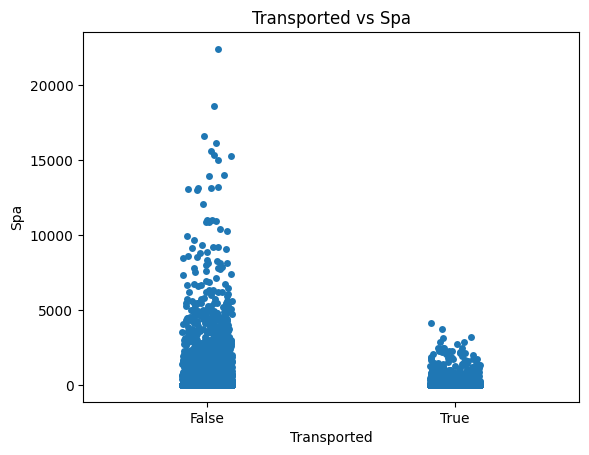

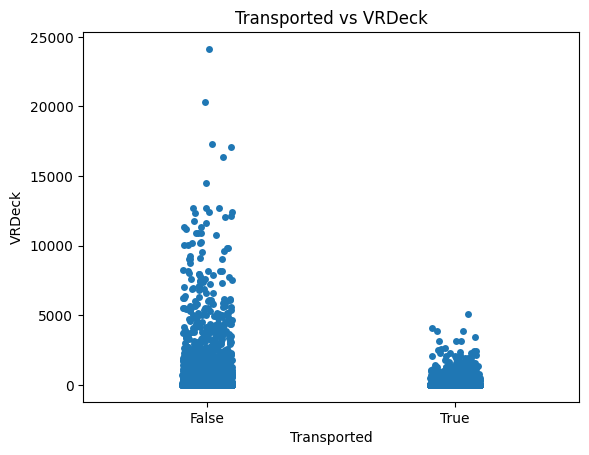

In [43]:
rows_to_delete=pd.DataFrame()
for feature in num_ncols_train.keys():
    plt.figure()
    # sns.violinplot(data=df_train,x="Transported",y=feature)
    plt.title(f"Transported vs {feature}")
    sns.stripplot(data=df_train,x="Transported",y=feature,jitter=True)
    plt.show()

In [44]:
df_train.query("FoodCourt>25000")


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1213,1292_01,Europa,False,B/55/S,55 Cancri e,31.0,True,0.0,27723.0,3.0,202.0,3146.0,Scharab Conale,True
2067,2215_01,Europa,False,A/27/S,55 Cancri e,41.0,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True
3198,3444_01,Europa,False,B/131/S,55 Cancri e,33.0,False,0.0,27071.0,0.0,15.0,0.0,Ainoxa Scerodbox,True
3538,3796_01,Europa,False,B/121/P,55 Cancri e,33.0,False,90.0,26830.0,0.0,27.0,703.0,Dhena Semageary,True


In [45]:
df_train.query("RoomService>9900")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False
5105,5455_01,Mars,False,E/344/P,55 Cancri e,13.0,False,9920.0,0.0,180.0,130.0,571.0,Varkes Nate,False


In [46]:
df_train.query("ShoppingMall>10000")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4724,5040_01,Europa,False,C/195/S,TRAPPIST-1e,26.0,False,0.0,21.0,10424.0,1373.0,7218.0,Enibik Dynigic,False
6223,6583_01,Europa,False,B/254/S,TRAPPIST-1e,13.0,False,0.0,100.0,12253.0,6.0,80.0,Charda Sunlove,True
7425,7941_01,Europa,False,C/257/P,TRAPPIST-1e,41.0,False,0.0,116.0,10705.0,9181.0,10.0,Alrakan Apedishaft,False
8415,8989_01,Europa,False,B/291/P,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,356.0,3.0,NaN,True


In [47]:
df_train.query("Spa>20000")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5722,6064_01,Europa,False,C/186/P,55 Cancri e,68.0,False,125.0,13437.0,0.0,22408.0,17.0,Markar Radisiouss,False


In [48]:
df_train.query("VRDeck>18000")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4311,4594_02,Europa,False,C/144/P,TRAPPIST-1e,31.0,False,0.0,6670.0,217.0,625.0,20336.0,Tabiton Folhal,False
5619,5977_02,Europa,False,B/230/S,55 Cancri e,57.0,False,200.0,9.0,0.0,NaN,24133.0,NaN,False


In [49]:
delete_ids=[1213,2067,3198,3538,4416,5105,4724,6223,7425,8415,5722,4311,5619]
df_train.drop(df_train[df_train.PassengerId.isin(delete_ids)].index, inplace=True)

#drop unnecesary columns:
df_train.drop(columns=["PassengerId","Name","Age"],inplace=True)
df_test.drop(columns=["PassengerId","Name","Age"],inplace=True)

## Cleansing and Feature Engineering

### Categorical

<Axes: xlabel='Side', ylabel='Count'>

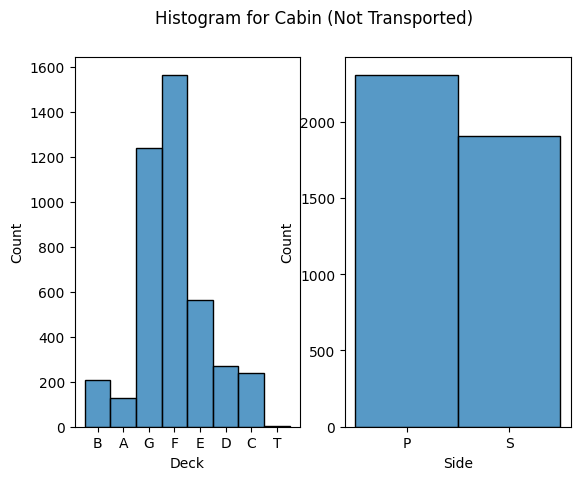

In [50]:
# Cabin

df_train["Deck"] = df_train["Cabin"].str[0]
df_train["Side"] = df_train["Cabin"].str[-1]

df_test["Deck"] = df_test["Cabin"].str[0]
df_test["Side"] = df_test["Cabin"].str[-1]

df_train.drop(columns=["Cabin"],inplace=True)
df_test.drop(columns=["Cabin"],inplace=True)

fig, axes = plt.subplots(1,2)
fig.suptitle("Histogram for Cabin (Not Transported)")

sns.histplot(data=df_train.where(df_train["Transported"]==False),x="Deck",ax=axes[0])
sns.histplot(data=df_train.where(df_train["Transported"]==False),x="Side",ax=axes[1])

<Axes: xlabel='Side', ylabel='Count'>

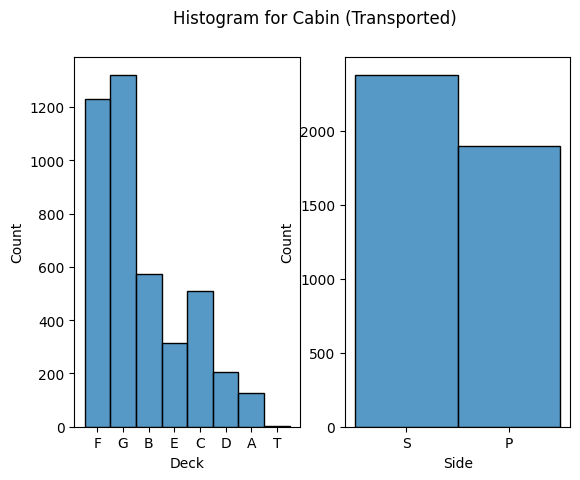

In [51]:
fig, axes = plt.subplots(1,2)
fig.suptitle("Histogram for Cabin (Transported)")

sns.histplot(data=df_train.where(df_train["Transported"]==True),x="Deck",ax=axes[0])
sns.histplot(data=df_train.where(df_train["Transported"]==True),x="Side",ax=axes[1])

It seems to be no difference between transported and not transported-> the NN will take care of that.

<Axes: xlabel='HomePlanet', ylabel='Count'>

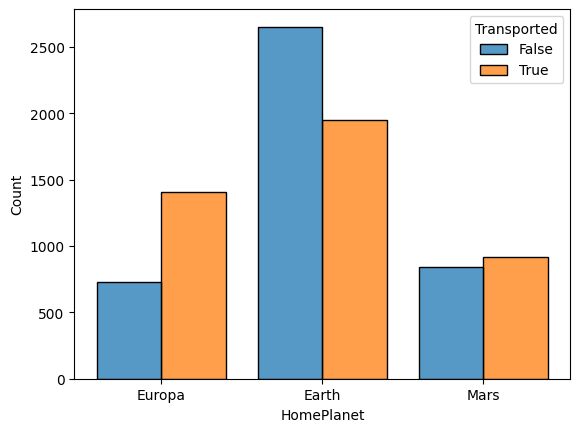

In [52]:

#HomePlanet
sns.histplot(data=df_train,hue="Transported",x="HomePlanet",multiple="dodge",shrink=.8)   

<Axes: xlabel='Destination', ylabel='Count'>

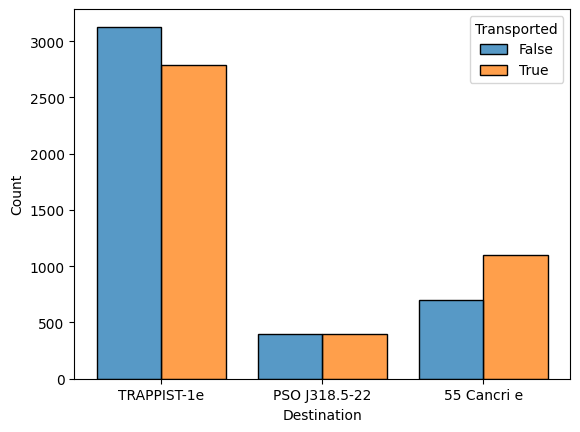

In [53]:
#Destination
sns.histplot(data=df_train,hue="Transported",x="Destination",multiple="dodge",shrink=.8)   

<Axes: xlabel='Transported', ylabel='HomePlanet'>

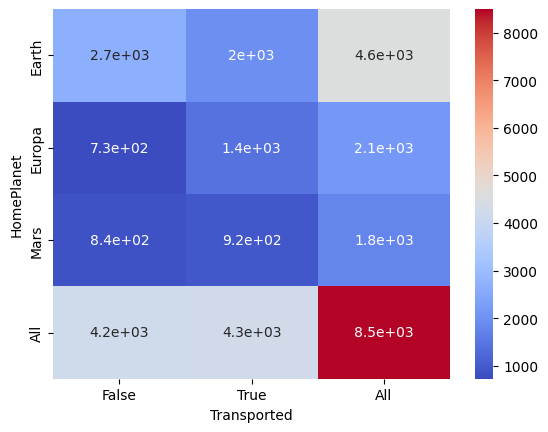

In [54]:
#HomePlanet
ct_margins=pd.crosstab(df_train["HomePlanet"],df_train["Transported"],margins=True)
sns.heatmap(ct_margins,cmap="coolwarm",annot=True)


<Axes: xlabel='Transported', ylabel='VIP'>

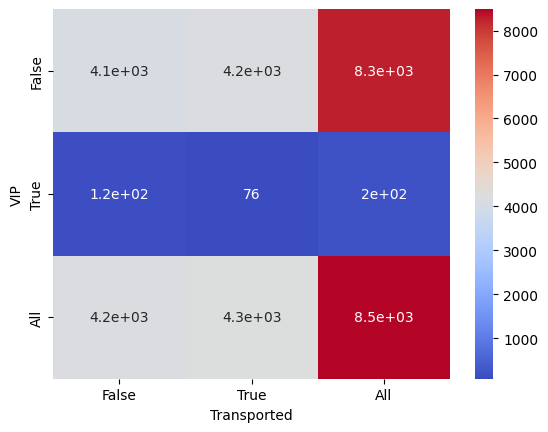

In [55]:
#VIP
ct_margins=pd.crosstab(df_train["VIP"],df_train["Transported"],margins=True)
sns.heatmap(ct_margins,cmap="coolwarm",annot=True)


<Axes: xlabel='Transported', ylabel='CryoSleep'>

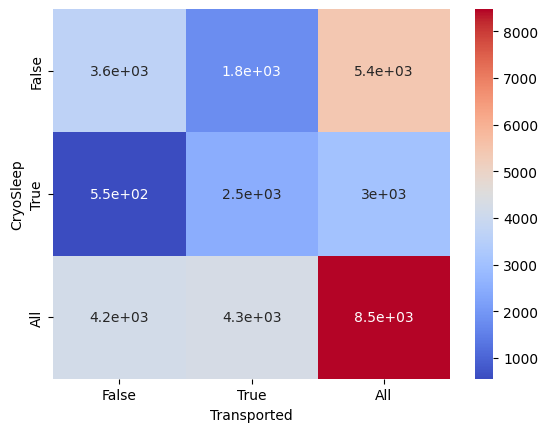

In [56]:
#CryoSleep
ct_margins=pd.crosstab(df_train["CryoSleep"],df_train["Transported"],margins=True)
sns.heatmap(ct_margins,cmap="coolwarm",annot=True)


<Axes: xlabel='Transported', ylabel='Destination'>

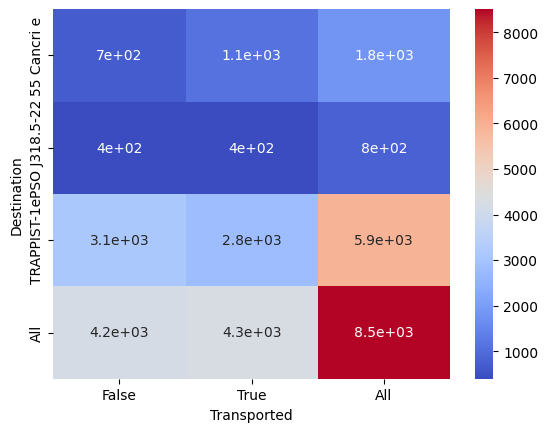

In [57]:
#Destination
ct_margins=pd.crosstab(df_train["Destination"],df_train["Transported"],margins=True)
sns.heatmap(ct_margins,cmap="coolwarm",annot=True)


Upper 60%, a decision is made:

-Majority of people are not VIP (97.7% T, 97.7% F) -> doesn't  apport information, hence it's deleted.

-Majority of people not transported do not use CryoSleep (86%)

-Majority of people goes to TRAPPIST-1e (65% T, 74% F)


In [58]:
#Filling up:

df_train.drop(columns=["VIP"],inplace=True)
df_test.drop(columns=["VIP"],inplace=True)
#it cannot be used!
# df_train["CryoSleep"].where(df_train["Transported"]==False, False,inplace=True)

df_train["Destination"].fillna("TRAPPIST-1e",inplace=True)
df_test["Destination"].fillna("TRAPPIST-1e",inplace=True)


In [59]:
df_train["Destination"].isnull().sum()*100/total

0.0

<Axes: xlabel='HomePlanet', ylabel='Count'>

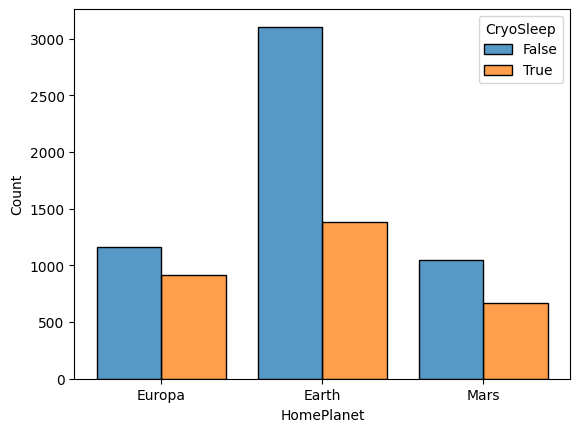

In [60]:
#CryoSleep and HomePlanet
sns.histplot(data=df_train,hue="CryoSleep",x="HomePlanet",multiple="dodge",shrink=.8)   



The majority of people from Earth are not carried on by CryoSleep.

In [61]:
#CryoSleep and Destination
df_train["CryoSleep"].where(df_train["HomePlanet"]=="Earth",False,inplace=True)
df_test["CryoSleep"].where(df_test["HomePlanet"]=="Earth",False,inplace=True)



*Unresolved: Homeplanets from transported or unstransported, Cryosleep decision for transported*

These complex relationships are resolved through **KNN ALGORITHM** imputer in a pipeline.

In [62]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder, RobustScaler,  MinMaxScaler

ord_pipeline=Pipeline(steps=[
     ('preimpute',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)),
    ("impute",SimpleImputer(strategy='median',fill_value='missing')),
    ('ohe',OneHotEncoder(sparse_output=False))
    ])

### Numerical 

In [63]:
# print("Nan Numerical (%)")
# num_ncols_train=df_train[num_train].isnull().sum()*100/total
# cat_ncols_train.sort_values(ascending=False)
# sns.pairplot(df_train, x_vars=["Spa", "VRDeck", "RoomService"], y_vars=["Transported"], hue="Transported")
print(df_train[df_train.Transported==True]["VRDeck"].describe())
print(df_train[df_train.Transported==False]["VRDeck"].describe())

count    4280.000000
mean       69.148131
std       291.658171
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5063.000000
Name: VRDeck, dtype: float64
count     4225.000000
mean       543.629822
std       1563.088368
min          0.000000
25%          0.000000
50%          1.000000
75%        388.000000
max      24133.000000
Name: VRDeck, dtype: float64


In [64]:
print(df_train[df_train.Transported==True]["Spa"].describe())
print(df_train[df_train.Transported==False]["Spa"].describe())

count    4287.000000
mean       61.675531
std       262.682871
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      4103.000000
Name: Spa, dtype: float64
count     4223.000000
mean       564.382666
std       1551.356047
min          0.000000
25%          0.000000
50%          4.000000
75%        453.500000
max      22408.000000
Name: Spa, dtype: float64


In [65]:
print(df_train[df_train.Transported==True]["RoomService"].describe())
print(df_train[df_train.Transported==False]["RoomService"].describe())

count    4295.000000
mean       63.098021
std       274.812497
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3992.000000
Name: RoomService, dtype: float64
count     4217.000000
mean       389.266066
std        875.638123
min          0.000000
25%          0.000000
50%          1.000000
75%        473.000000
max      14327.000000
Name: RoomService, dtype: float64


In [66]:
df_train["VRDeck+Spa"]=df_train["VRDeck"]+df_train["Spa"]
df_test["VRDeck+Spa"]=df_test["VRDeck"]+df_test["Spa"]

df_train.drop(columns=["VRDeck","Spa"],inplace=True)
df_test.drop(columns=["VRDeck","Spa"],inplace=True)


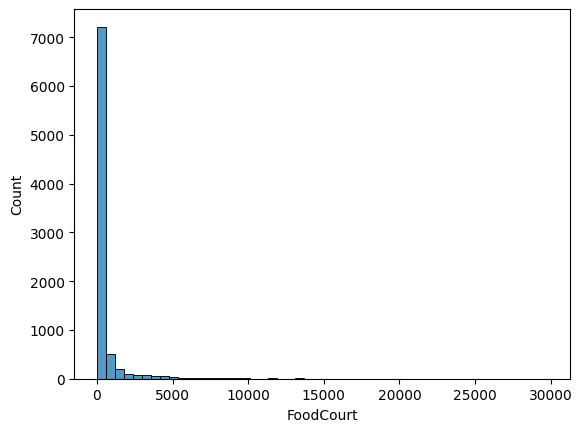

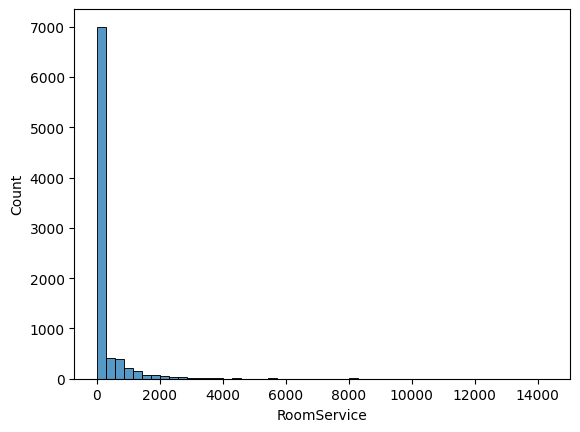

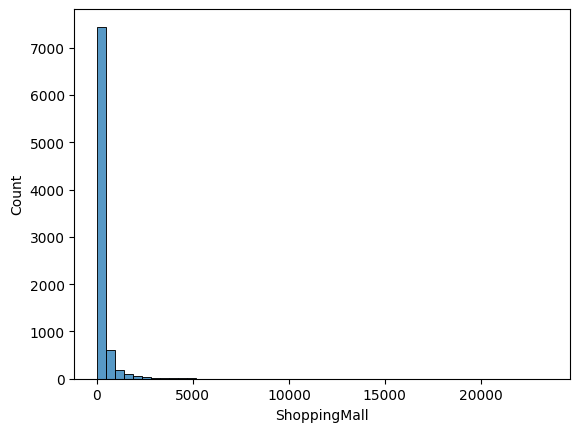

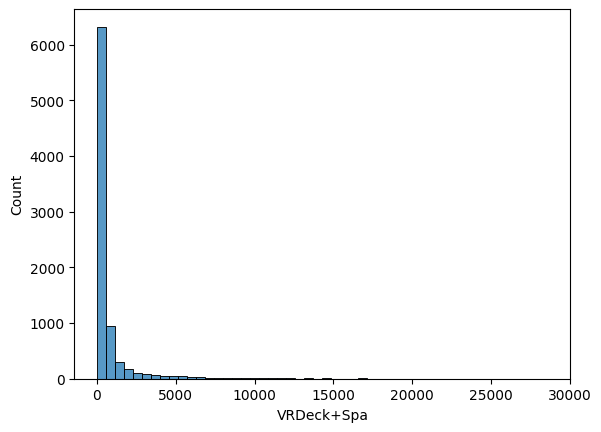

In [67]:
cat_train,num_train=idfy_cols(df_train.loc[:, df_train.isna().any()])

for col in num_train:
    sns.histplot(data=df_train,x=col,bins=50)
    plt.show()

All the numerical features are scaled by MinMax due to there's no shape in the distribution.

In [68]:
#Numerical Imputers
df_train.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Transported,Deck,Side,VRDeck+Spa
0,Europa,False,TRAPPIST-1e,0.0,0.0,0.0,False,B,P,0.0
1,Earth,False,TRAPPIST-1e,109.0,9.0,25.0,True,F,S,593.0
2,Europa,False,TRAPPIST-1e,43.0,3576.0,0.0,False,A,S,6764.0
3,Europa,False,TRAPPIST-1e,0.0,1283.0,371.0,False,A,S,3522.0
4,Earth,False,TRAPPIST-1e,303.0,70.0,151.0,True,F,S,567.0


In [69]:
num_pipeline=Pipeline(steps=[
    ('impute',KNNImputer(n_neighbors=100)),
    ('scaler',MinMaxScaler())
])
from sklearn.compose import make_column_transformer, ColumnTransformer
col_trans=ColumnTransformer(transformers=[
    ('num',num_pipeline,["RoomService","FoodCourt","ShoppingMall","VRDeck+Spa"]),
    ('ord',ord_pipeline,["HomePlanet","CryoSleep","Destination","Deck","Side"])
],
remainder='passthrough', 
n_jobs=-1,              
)
pipeline=Pipeline(steps=[
("preprocessing",col_trans)
]) 
pipeline.set_output(transform='pandas')

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=100)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall',
                                                   'VRDeck+Spa']),
                                                 ('ord',
                                                  Pipeline(steps=[('preimpute',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='median')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'Deck',
                                                   'Side'])]))])

In [70]:
X = df_train.drop("Transported",axis=1)
y=df_train["Transported"]
X_pre=pipeline.fit_transform(X)
X_pre.head()

,num__RoomService,num__FoodCourt,num__ShoppingMall,num__VRDeck+Spa,ord__HomePlanet_0.0,ord__HomePlanet_1.0,ord__HomePlanet_2.0,ord__CryoSleep_0.0,ord__CryoSleep_1.0,ord__Destination_0.0,...,ord__Deck_0.0,ord__Deck_1.0,ord__Deck_2.0,ord__Deck_3.0,ord__Deck_4.0,ord__Deck_5.0,ord__Deck_6.0,ord__Deck_7.0,ord__Side_0.0,ord__Side_1.0
0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.007608,0.000302,0.001064,0.020734,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.003001,0.119948,0.000000,0.236503,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.043035,0.015793,0.123147,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.021149,0.002348,0.006428,0.019825,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<Axes: >

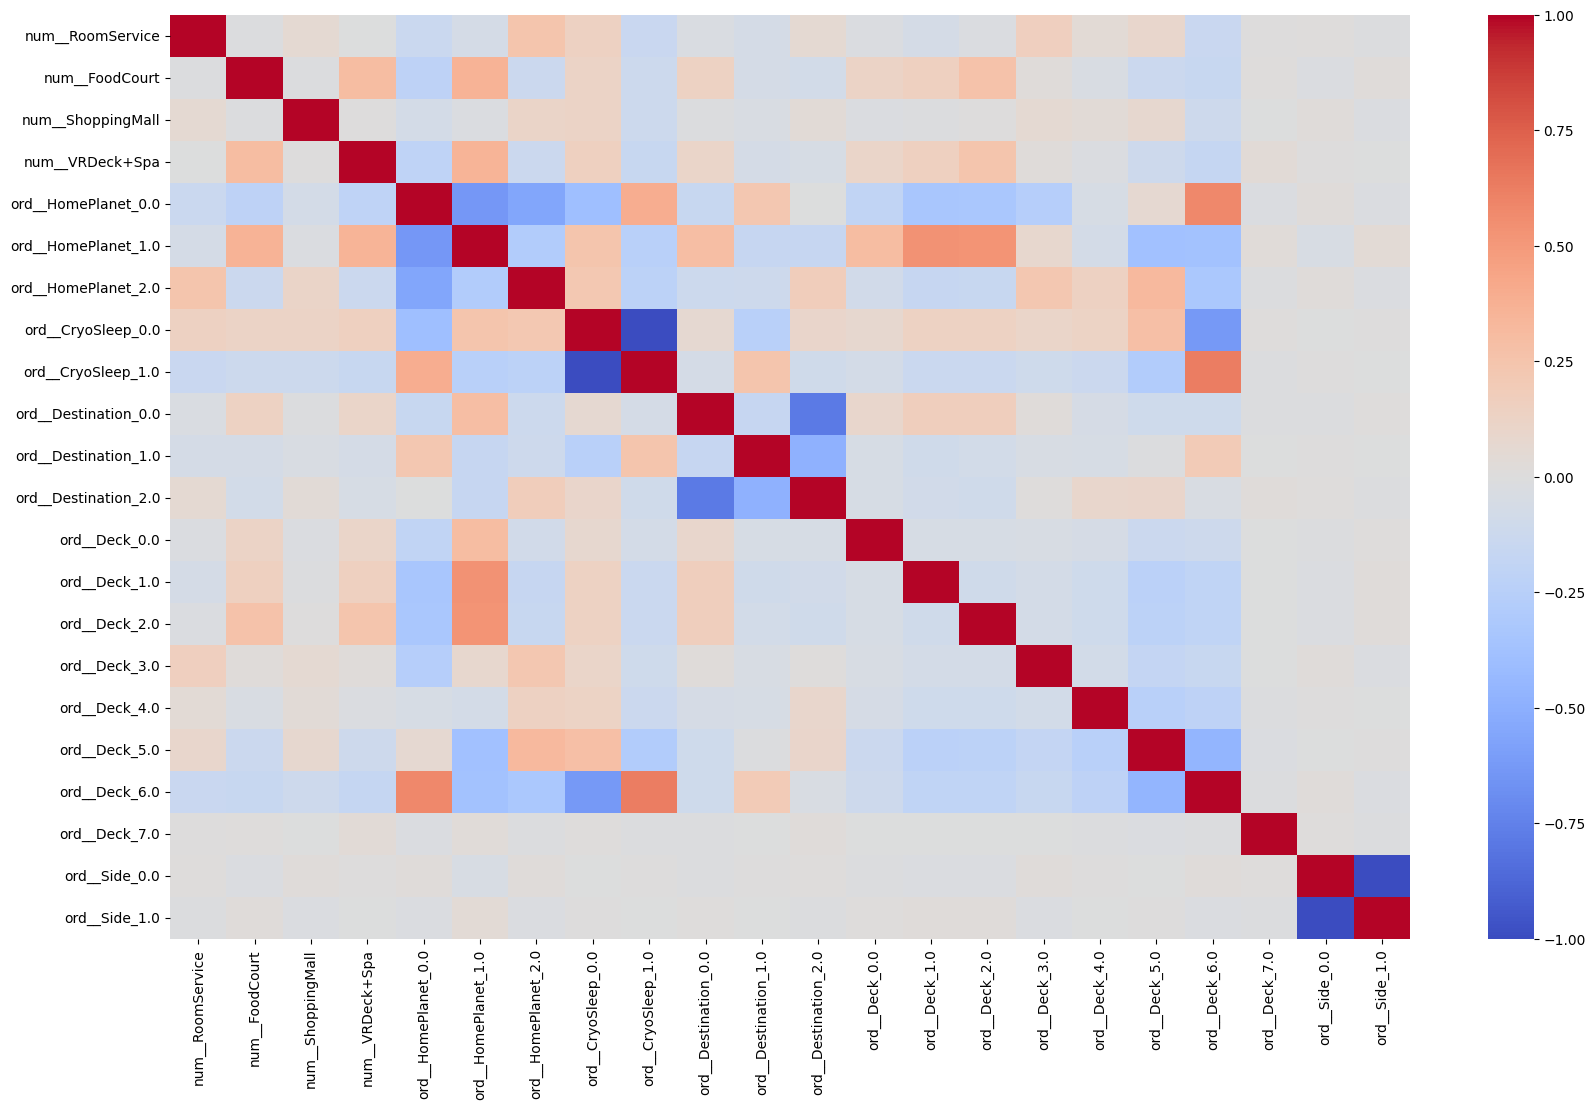

In [71]:
corr_matrix = X_pre.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")

In [72]:
X_pre.drop(columns=["ord__Deck_7.0","ord__Side_0.0","ord__Side_1.0"],inplace=True)

# Machine Learning Process

Classification models: 
1. **Support Vector Machine(SVM)** : ❌
   
  Transfrom the data into linear decision space, the nature of the problem hasn't a linear behaviour 
   
2. **K-Nearest Neighbors (KNN)**: ✔
   
   It compares each example from a class to all in the proximity-> usefull in classification 
   
3. **Decision Tree**: Tree with nodes and leaves -> ✔
   
  - useful for the categorical features: homeplanet,Cryosleep,destination,cabin.  
  - work best for simple cases with few variables (dataset unnormalized)

4. **ANN**:❌
   
  - useful for a large dataset 
  - if the data is not representative, it could lead to overfitting 
  - useful when there are complex relationships 

5. **Logistic Regression**: ❌
  high bias, low variance when it's based on a probability threshold  (for this exercise, it's better to use higher variance than lower bias)

6. **Naive Bayes**: ✔
   
  work well under the assumption that a feature is independent of any other in the dataset (during the EDA, there was not any strong direct relationship)

7. **Linear Discriminant Analysis (LDA)**: ❌
   
  Classification problem with linear decision boundary (similar to SVM), works well when classes share characteristics 

8. **Quadratic Discriminant Analysis (QDA)**:✔
   
  - Useful for a lot of training data 
  - Features not linearly separable


I'll Consider the above and follow the classification guide:

![alt text](MLmap.PNG)

In [73]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
#Quadratic
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Trees
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#KNC
from sklearn.neighbors import KNeighborsClassifier
#SVC
from sklearn.svm import LinearSVC
#Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.33,random_state=0)

rforest=RandomForestClassifier()
neigh= KNeighborsClassifier(n_neighbors=100)
tree = DecisionTreeClassifier()
naive_bayes=GaussianNB()
QDA=QuadraticDiscriminantAnalysis()
SVC=LinearSVC(max_iter=1000)
HGBC=HistGradientBoostingClassifier(max_iter=100)
ETC=ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)



LinearSVC

In [74]:
print("LSVC Test")
SVC.fit(X_train,y_train)
SVC.score(X_test,y_test)
#not so well

LSVC Test


0.7765772046009063

KNN

In [75]:
print("KNN Test")
neigh.fit(X_train,y_train)
neigh.score(X_test,y_test)
#worst

KNN Test


0.7486929243638899

Trees Algorithms

In [76]:
print("D. Tree Test")
tree.fit(X_train,y_train)
tree.score(X_test,y_test)


D. Tree Test


0.7323109097246427

In [77]:
print("Naive Bayes Test")
naive_bayes.fit(X_train,y_train)
naive_bayes.score(X_test,y_test)


Naive Bayes Test


0.7441617288253747

In [78]:
print("QDA Test")
QDA.fit(X_train,y_train)
QDA.score(X_test,y_test)

QDA Test


0.7598466364586964

Ensembles

In [79]:
print("Random Forest Test")
rforest.fit(X_train,y_train)
rforest.score(X_test,y_test)

Random Forest Test


0.7859881491808993

In [80]:
print("ExtraTrees Test")
ETC.fit(X_train,y_train)
ETC.score(X_test,y_test)

ExtraTrees Test


0.7751829905890554

In [81]:
#The best one!
print("HGBC Test")
HGBC.fit(X_train,y_train)
HGBC.score(X_test,y_test)

HGBC Test


0.798187521784594

## Hyperparametter Tuning


In [82]:
param_grid_hist_gradient_boosting = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],            # Varying the learning rate for step size
    'min_samples_leaf': [10, 20, 50],                   # Minimum samples required in a leaf node
    'l2_regularization': [0.0, 0.1, 0.5],               # Regularization term to prevent overfitting
    'max_bins':[50, 100, 255],                             # Number of bins for histogram-based splits
}
HGBC_cv=RandomizedSearchCV(HGBC,param_grid_hist_gradient_boosting,n_iter=3,n_jobs=-1,verbose=2)

In [83]:
print('Fitting Hist Gradient Boosting')
print(HGBC_cv.fit(X_train,y_train))

print('Best Score')
print(HGBC_cv.best_estimator_.score(X_test,y_test))

Fitting Hist Gradient Boosting
Fitting 5 folds for each of 3 candidates, totalling 15 fits
RandomizedSearchCV(estimator=HistGradientBoostingClassifier(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_bins': [50, 100, 255],
                                        'min_samples_leaf': [10, 20, 50]},
                   verbose=2)
Best Score
0.7852910421749738


## Final Prediction

In [86]:
X_finaltest = pipeline.transform(df_test)
X_finaltest.drop(columns=["ord__Deck_7.0","ord__Side_0.0","ord__Side_1.0"],inplace=True)
finaltest = pd.read_csv("sample_submission.csv")
y_finaltest=finaltest.iloc[:,1]

In [87]:
y_pred=HGBC.predict(X_finaltest)
df=pd.DataFrame({'PassengerId':finaltest["PassengerId"],'Transported':y_pred})
df.to_csv("sub.csv",index=False)